By: Michał Marusiński

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import floor
import patient_df_merge as merge


path to given rating folder

With use of patient_df_merge module we concatenate all files in a ratings file to make it as one dataset

In [2]:
patients_filtered = pd.read_excel(r"C:\Users\48660\Desktop\Development Workshop\keys\participants_pic_filtered.xlsx")
valid_patients = merge.get_valid_patients(patients_filtered) #obtainining valid patients from filtered comments

In [3]:
dir_path = r"C:\Users\48660\Desktop\Development Workshop\ratings"

merged_df = merge.merge_csv_files(input_directory = dir_path, valid_patients_list= valid_patients)
df_size = merged_df.shape

Merging data with patient: S01 ---> file: C:\Users\48660\Desktop\Development Workshop\ratings\2022_Dec_16_1126S01_rating.csv
Merging data with patient: S02 ---> file: C:\Users\48660\Desktop\Development Workshop\ratings\2022_Dec_19_1126S02_rating.csv
Merging data with patient: S03 ---> file: C:\Users\48660\Desktop\Development Workshop\ratings\2022_Dec_20_1136S03.csv
Merging data with patient: S04 ---> file: C:\Users\48660\Desktop\Development Workshop\ratings\2022_Dec_21_1106S04.csv
Merging data with patient: S05 ---> file: C:\Users\48660\Desktop\Development Workshop\ratings\2022_Dec_22_0959S05.csv
Merging data with patient: S06 ---> file: C:\Users\48660\Desktop\Development Workshop\ratings\2022_Dec_28_1408s06.csv
Merging data with patient: S10 ---> file: C:\Users\48660\Desktop\Development Workshop\ratings\2022_Dec_29_1058s10.csv
Merging data with patient: S08 ---> file: C:\Users\48660\Desktop\Development Workshop\ratings\2022_Dec_30_1411s08.csv
Merging data with patient: S47 ---> file: 

In [4]:
merged_df.head()

,image9,trials.thisRepN,trials.thisTrialN,trials.thisN,trials.thisIndex,trials_2.thisRepN,trials_2.thisTrialN,trials_2.thisN,trials_2.thisIndex,text_2.started,...,key_resp_6.stopped,text_3.started,text_3.stopped,Kod_osoby_badanej,date,expName,psychopyVersion,frameRate,Unnamed: 62,Unnamed: 60
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.396821,...,NaN,NaN,NaN,S01_rating,2022_Dec_16_1126,rating,2021.1.4,59.967857,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,S01_rating,2022_Dec_16_1126,rating,2021.1.4,59.967857,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,S01_rating,2022_Dec_16_1126,rating,2021.1.4,59.967857,NaN,NaN
3,neg_IAPS_9325.png,0.0,0.0,0.0,173.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,S01_rating,2022_Dec_16_1126,rating,2021.1.4,59.967857,NaN,NaN
4,neu_IAPS_2593.png,0.0,1.0,1.0,149.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,S01_rating,2022_Dec_16_1126,rating,2021.1.4,59.967857,NaN,NaN


In [5]:
#looking for NaN values in columns (if sum(NaNs) >= 240 then delete column)
import empty_values_clear_func

merged_df = empty_values_clear_func.clear_nan_values(merged_df)



Amount of NaN values in columns: 
Column: --- image9 --- amount of NaN values: --- 303 ---
Column: --- trials.thisRepN --- amount of NaN values: --- 303 ---
Column: --- trials.thisTrialN --- amount of NaN values: --- 303 ---
Column: --- trials.thisN --- amount of NaN values: --- 303 ---
Column: --- trials.thisIndex --- amount of NaN values: --- 303 ---
Column: --- trials_2.thisRepN --- amount of NaN values: --- 18543 ---
Column: --- trials_2.thisTrialN --- amount of NaN values: --- 18543 ---
Column: --- trials_2.thisN --- amount of NaN values: --- 18543 ---
Column: --- trials_2.thisIndex --- amount of NaN values: --- 18543 ---
Column: --- text_2.started --- amount of NaN values: --- 18847 ---
Column: --- text_2.stopped --- amount of NaN values: --- 18923 ---
Column: --- text_9.started --- amount of NaN values: --- 18847 ---
Column: --- text_9.stopped --- amount of NaN values: --- 18923 ---
Column: --- image_4.started --- amount of NaN values: --- 18847 ---
Column: --- image_4.stopped -

'\ncolumns_dropped = []\n\nprint("Amount of NaN values in columns: ")\nfor column in merged_df.columns:\n    \n    nan_sum = merged_df[column].isna().sum()\n    print(f"Column: --- {column} --- amount of NaN values: --- {nan_sum} ---")\n    \n    if nan_sum > 683:\n        \n        merged_df.drop([column], axis = 1, inplace = True)\n        columns_dropped.append(column)\n        continue\n        \n    nan_indices = merged_df[column].index[merged_df[column].isna()]\n    \n    for i in nan_indices:\n        \n        if merged_df[[column]].dtypes.values == \'float64\':\n            \n            if i == 0:  \n                \n                if not pd.isna(merged_df.loc[i+1, column]):\n                    merged_df.loc[i, column] = merged_df.loc[i + 1, column]\n                else:\n                    merged_df.loc[i, column] = merged_df[column].mean()\n                    \n            elif i == merged_df.shape[0] - 1:\n                \n                if not pd.isna(merged_df.lo

In [6]:
merged_df.dropna(subset = 'image9', inplace = True) #we have to delete all rows where image9 doesn't have any value (no image included)
merged_df.reset_index(drop = True, inplace = True)

Let's check how many of the samples and columns we lost

In [7]:
np.subtract(df_size ,merged_df.shape)

array([303,  43])

Rather satisfying results, amount of columns doesn't bother us that much

In [8]:
merged_df.head()


,image9,trials.thisRepN,trials.thisTrialN,trials.thisN,trials.thisIndex,text_4.started,image.started,mouse.started,Valence.started,Valence_rating.response,...,Valence_rating.started,Arousal.started,Arousal_rating.response,Arousal_rating.rt,Arousal_rating.started,Kod_osoby_badanej,date,expName,psychopyVersion,frameRate
0,neg_IAPS_9325.png,0.0,0.0,0.0,173.0,87.767878,87.767878,0.001703,90.190618,3.0,...,0.005782,90.190618,6.0,10.296,0.005782,S01_rating,2022_Dec_16_1126,rating,2021.1.4,59.967857
1,neu_IAPS_2593.png,0.0,1.0,1.0,149.0,104.943973,104.943973,0.003452,107.046095,7.0,...,0.013047,107.046095,3.0,30.303,0.013047,S01_rating,2022_Dec_16_1126,rating,2021.1.4,59.967857
2,hi_neg_EmoPics_251.png,0.0,2.0,2.0,5.0,137.397414,137.397414,0.007579,140.316976,3.0,...,0.012221,140.316976,5.0,5.624,0.012221,S01_rating,2022_Dec_16_1126,rating,2021.1.4,59.967857
3,hi_pos_NAPS_People_190_h.png,0.0,3.0,3.0,212.0,150.274517,150.274517,0.001352,151.598203,7.0,...,0.014221,151.598203,3.0,5.729,0.014221,S01_rating,2022_Dec_16_1126,rating,2021.1.4,59.967857
4,pos_EmoPics_051.png,0.0,4.0,4.0,9.0,164.203495,164.203495,0.010700,166.333420,5.0,...,0.013314,166.333420,4.0,2.346,0.013314,S01_rating,2022_Dec_16_1126,rating,2021.1.4,59.967857


In [9]:
for col in ['trials.thisRepN', 'frameRate', 'psychopyVersion']:
    print(f"Unique values for column: {col} --- {merged_df[col].unique()}")

Unique values for column: trials.thisRepN --- [0.]
Unique values for column: frameRate --- [59.96785723 59.99941201 60.07427584 59.97936709 59.9957763  59.95326045
 59.94718653 59.97530218 59.97965494 59.98433208 59.97670507 59.99494837
 60.04311097 60.05962718 60.10897755 59.9929688  59.99703619 59.97817993
 59.8516756  59.97994267 59.85450567 60.04491363 59.95897607 59.98670695
 59.96084557 59.9887581  59.94919905 60.00247211 59.98084213 59.97537412
 60.97334188 59.9262787  59.9819574  60.0073329  60.88024308 59.97548202
 59.98062625 59.9861669  60.01151021 59.97871954 59.95430285 59.97537408
 60.04686062 59.97440293 60.04386803 59.91514818 59.97019482 59.97346773
 58.87537435 59.91091245 59.95804136 59.9757698  59.82489253 59.97127376
 60.0273965  59.94495854 60.885173   59.98159766 59.98242515 59.96810895
 59.96009058 59.96990711 59.94334153 59.95128358 59.96131299 59.99199708
 59.97433099 59.97508635 59.94377276 60.05064675 59.94797715 60.00409225
 60.02945045 60.02588318]
Unique 

trials.thisRepN and psychopyVersion is useless - only 1 value, not giving any information for future models. FrameRate value isn't very groudbreaking as it has values very similar to 60 fps.

In [10]:
columns_to_drop = ['trials.thisRepN', 'frameRate', 'psychopyVersion']   #additional columns to drop
merged_df.drop(columns_to_drop, inplace = True, axis = 1)


In [11]:
merged_df.describe()

,trials.thisTrialN,trials.thisN,trials.thisIndex,text_4.started,image.started,mouse.started,Valence.started,Valence_rating.response,Valence_rating.rt,Valence_rating.started,Arousal.started,Arousal_rating.response,Arousal_rating.rt,Arousal_rating.started
count,18620.000000,18620.000000,18620.000000,18620.000000,18620.000000,18620.000000,18620.000000,18620.000000,18620.000000,18620.000000,18620.000000,18620.000000,18620.000000,18620.000000
mean,119.795918,119.795918,119.360097,970.378260,970.378260,0.008373,972.402772,5.077927,4.275668,0.007508,972.402772,3.381901,3.410846,0.007508
std,69.203126,69.203126,69.315356,559.253725,559.253725,0.004735,559.565522,1.982792,2.986797,0.005332,559.565522,2.307144,2.908365,0.005332
min,0.000000,0.000000,0.000000,42.484212,42.484212,0.000005,45.398883,1.000000,1.055000,0.000007,45.398883,1.000000,0.637000,0.000007
25%,60.000000,60.000000,59.000000,540.182565,540.182565,0.004358,541.951916,4.000000,2.742000,0.002801,541.951916,1.000000,1.819000,0.002801
50%,120.000000,120.000000,119.000000,910.062660,910.062660,0.008317,911.455926,5.000000,3.577000,0.004246,911.455926,3.000000,2.822000,0.004246
75%,179.000000,179.000000,179.000000,1304.860497,1304.860497,0.012415,1306.544245,6.000000,4.847000,0.012427,1306.544245,5.000000,4.149000,0.012427
max,239.000000,239.000000,239.000000,3567.978708,3567.978708,0.016703,3569.591835,9.000000,129.066000,0.016705,3569.591835,9.000000,125.057000,0.016705


In [12]:
merged_df.columns

Index(['image9', 'trials.thisTrialN', 'trials.thisN', 'trials.thisIndex',
       'text_4.started', 'image.started', 'mouse.started', 'Valence.started',
       'Valence_rating.response', 'Valence_rating.rt',
       'Valence_rating.started', 'Arousal.started', 'Arousal_rating.response',
       'Arousal_rating.rt', 'Arousal_rating.started', 'Kod_osoby_badanej',
       'date', 'expName'],
      dtype='object')

In [13]:
merged_df.shape

(18620, 18)

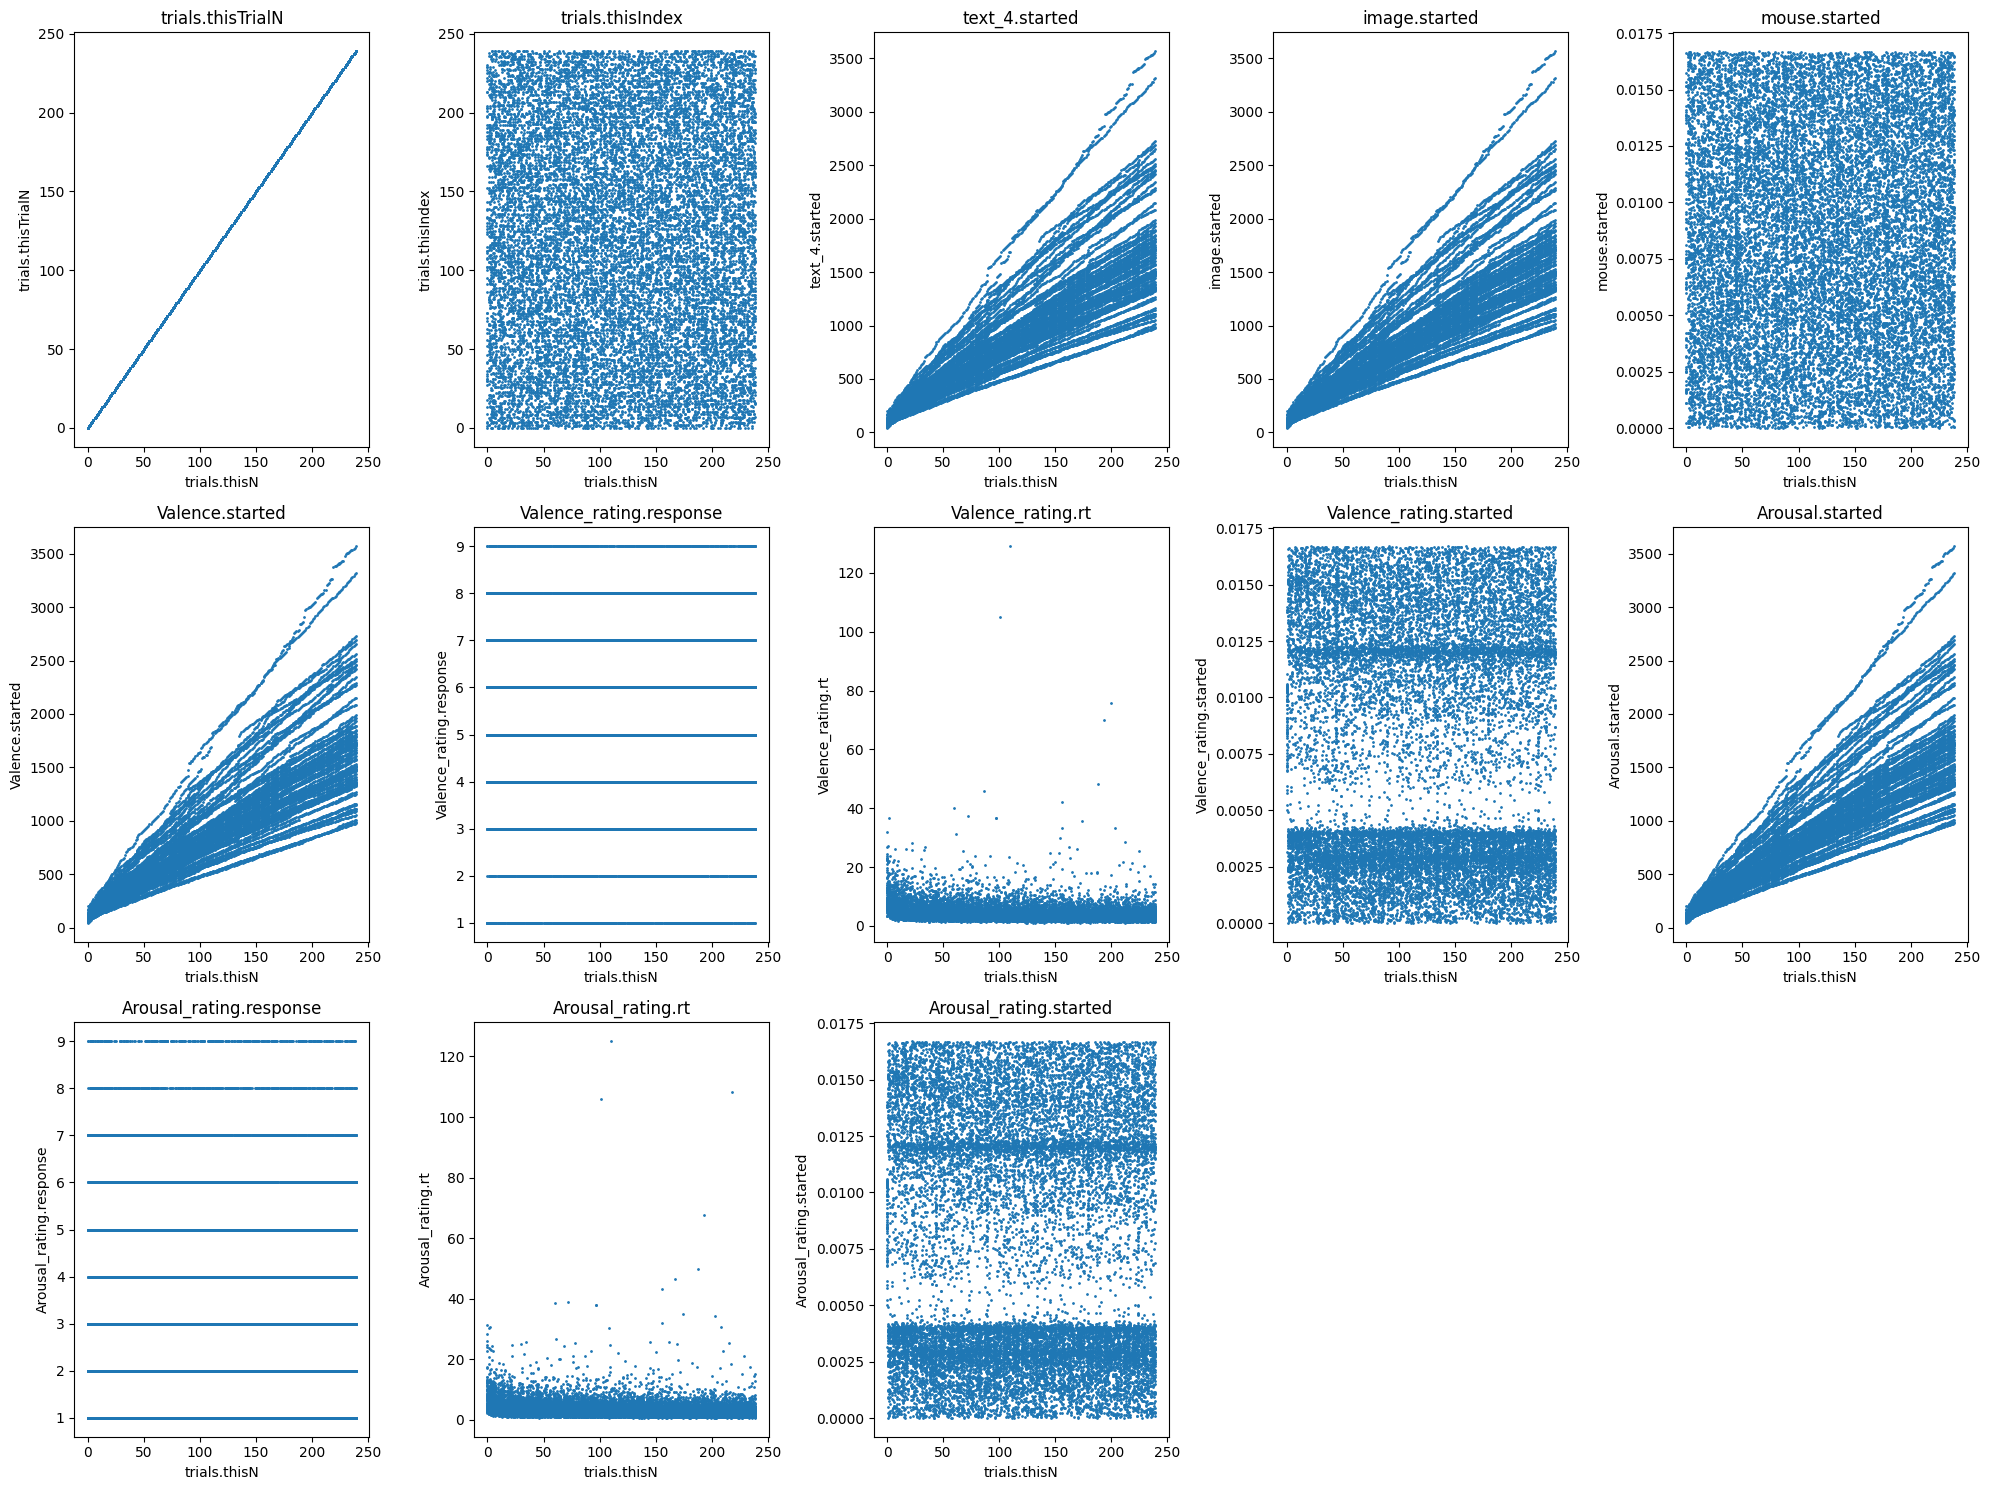

In [14]:
numeric_columns = merged_df.select_dtypes(include='number').columns.tolist() #identyfing numerical columns
numeric_columns.remove('trials.thisN')  #we remove our base (x-axis) column for numerics

num_plots = len(numeric_columns)
num_cols = 5  
num_rows = (num_plots + num_cols - 1) // num_cols  

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
axs = axs.flatten() #flattening of axs for iteration purposes

for i, col in enumerate(numeric_columns):
    ax = axs[i]
    ax.scatter(merged_df['trials.thisN'], merged_df[col], linestyle='-', marker = 'o', s = 1)
    ax.set_title(col)
    ax.set_xlabel('trials.thisN')
    ax.set_ylabel(col)

#deleting useless columns
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


In [15]:
def plot_histogram(df, column, no_bins = 9):
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins= no_bins, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

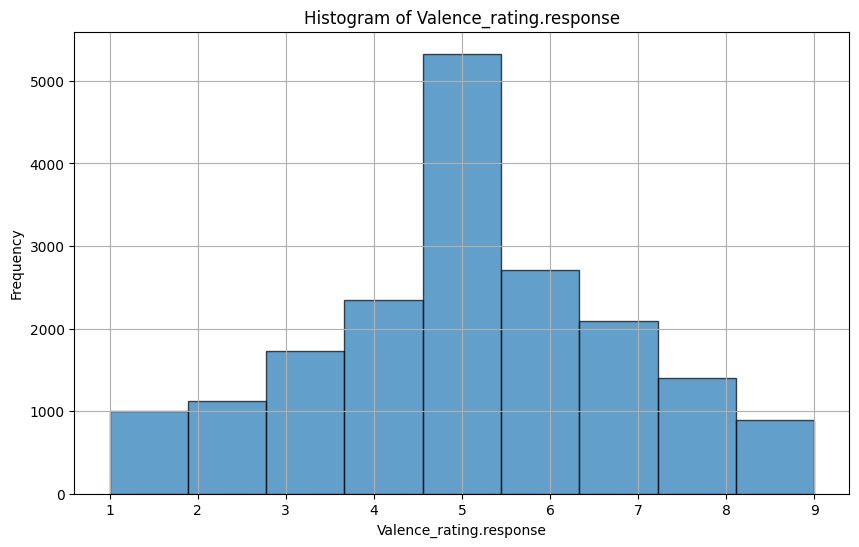

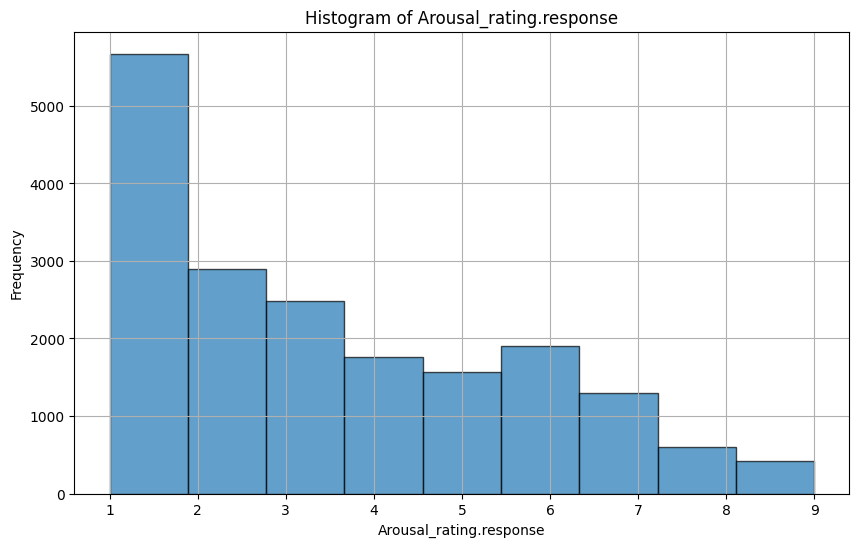

In [16]:
plot_histogram(merged_df, 'Valence_rating.response')
plot_histogram(merged_df, 'Arousal_rating.response')

As shown in the graphs (trials.thisN - Arousal_rating.response / trials.thisN - Valence_rating.response) all values are in range 1 - 9.

For the next part we delete columns useless for our Models: Kod_osoby_badanej, date, expName, image9

In [17]:
cols = ['Kod_osoby_badanej', 'date', 'expName', 'image9']
merged_df.drop(cols, inplace = True, axis = 1)



We overwrite preprocessed DataFrame to make it easier to use in model scripts

In [18]:
merged_df.to_csv(r"C:\Users\48660\Desktop\Development Workshop\ratings\valid_patients_data.csv", index=False)